# Calcium single video analysis
#### Author: Youngbin Kim
#### Last updated: 02/22/24

This notebook goes over basic analysis of single videos for calcium handling functional assessment. To analyze multiple videos in a single run, please check the batch analysis notebook.

## Import packages

In [73]:
import beatprofiler as bp
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

## Analyze data

In [74]:
# file path of your video
file_path = r"sample videos/ca tissue 20fps.mkv"

# create a video object to handle reading the video and extracting trace
video = bp.FluoVideo(file_path=file_path, frame_rate=20)

# calculate mask
video.calculate_mask(method="max fft")

# extract trace
video.calculate_trace()

# create a trace object to handle drift correction and peak identification/analysis
trace = bp.Trace(data=video.trace[1:], frame_rate=video.frame_rate)

# correct for photobleaching
trace.calculate_drift(method="exp", min_prominence=0.1)

# detect and analyze beats
trace.analyze_peaks(min_prominence=0.2)

J:\.shortcut-targets-by-id\0Bz-k3GVdqSBHSUZDVFhiMzFBSXc\E\Columbia\GVN Lab\BeatProfiler\tutorial notebooks\beatprofiler.py:1144: RuntimeWarning: invalid value encountered in power
  return A*np.exp(-(t/tau)**(1-beta))+cons


## Plot and Visualize data

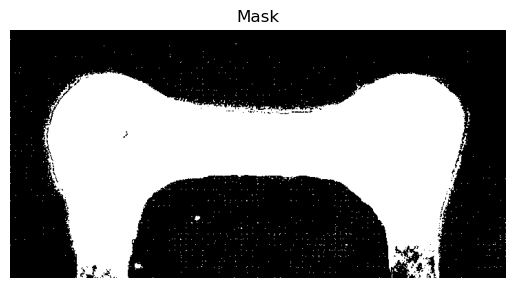

In [75]:
# mask show
plt.imshow(video.mask, cmap="gray")
plt.axis('off')
plt.title("Mask");

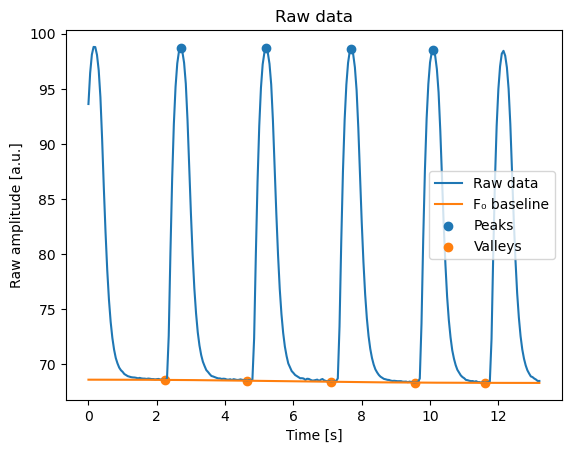

In [76]:
plt.plot(np.arange(len(trace.raw_data))/trace.frame_rate, trace.raw_data, label="Raw data")
plt.plot(np.arange(len(trace.baseline))/trace.frame_rate, trace.baseline, label="F₀ baseline")
plt.scatter(trace.peaks/trace.frame_rate,trace.raw_data[trace.peaks], label = "Peaks")
plt.scatter(trace.valleys/trace.frame_rate,trace.raw_data[trace.valleys], label = "Valleys")
plt.legend()
plt.title("Raw data")
plt.xlabel("Time [s]")
plt.ylabel("Raw amplitude [a.u.]");

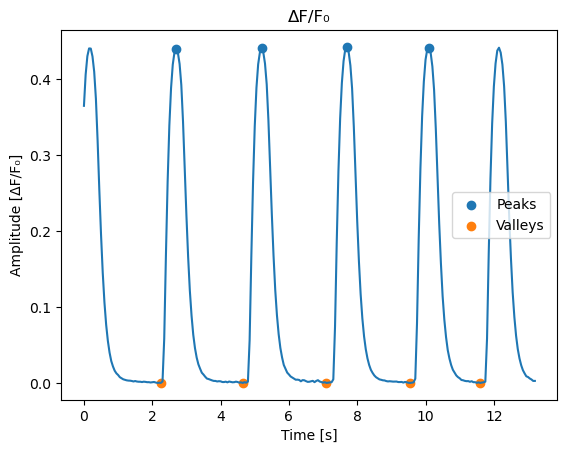

In [77]:
plt.plot(np.arange(len(trace.df_f0))/trace.frame_rate, trace.df_f0)
plt.scatter(trace.peaks/trace.frame_rate,trace.df_f0[trace.peaks], label = "Peaks")
plt.scatter(trace.valleys/trace.frame_rate,trace.df_f0[trace.valleys], label = "Valleys")
plt.legend()
plt.title("ΔF/F₀")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [ΔF/F₀]");

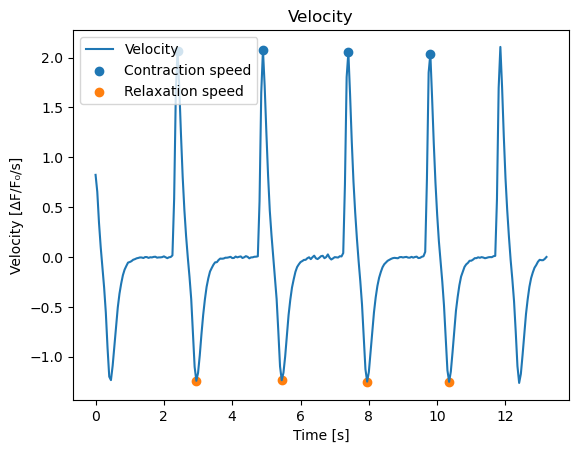

In [78]:
plt.plot(np.arange(len(trace.velocity))/trace.frame_rate, trace.velocity, label="Velocity")
plt.scatter(trace.contraction_speeds_index/trace.frame_rate, trace.velocity[trace.contraction_speeds_index], label = "Contraction speed")
plt.scatter(trace.relaxation_speeds_index/trace.frame_rate, trace.velocity[trace.relaxation_speeds_index], label = "Relaxation speed")
plt.legend()
plt.title("Velocity")
plt.xlabel("Time [s]")
if trace.amplitude_unit:
    plt.ylabel("Velocity [ΔF/F₀/s]")
else:
    plt.ylabel("Velocity [a.u.]")

In [79]:
# summary
trace.feature_summary.dropna()

num beats                            4.000000
beat frequency [bpm]                24.324324
RMSSD [s]                            2.467117
mean RR interval [s]                 2.466667
mean amplitude [df/F0]               0.441715
mean auc [df/F0*s]                   0.250741
mean contract50 [s]                  0.277462
mean contract90 [s]                  0.367182
mean contraction speed [df/F0/s]     2.059221
mean fw90m [s]                       0.920269
mean fwhm [s]                        0.573864
mean raw amplitude [a.u.]           30.204271
mean relax50 [s]                     0.296403
mean relax90 [s]                     0.553087
mean relaxation speed [df/F0/s]      1.244892
mean tau [s]                         0.350548
SDRR [s]                             0.047140
std amplitude [df/F0]                0.000637
std auc [df/F0*s]                    0.001482
std contract50 [s]                   0.005529
std contract90 [s]                   0.006238
std contraction speed [df/F0/s]   

In [80]:
# peak summary
trace.peak_summary.dropna(how="all", axis=1)

,beat index,tau [s],fwhm [s],contract50 [s],relax50 [s],fw90m [s],contract90 [s],relax90 [s],amplitude [df/F0],raw amplitude [a.u.],auc [df/F0*s],contraction speed [df/F0/s],relaxation speed [df/F0/s]
None,54,0.354392,0.573579,0.273419,0.300160,0.920148,0.362684,0.557465,0.441237,30.171565,0.250787,2.069584,1.241421
None,104,0.355605,0.573474,0.272160,0.301314,0.918380,0.361045,0.557336,0.442080,30.229216,0.251087,2.077371,1.236254
None,154,0.347059,0.573779,0.280794,0.292985,0.921902,0.371426,0.550476,0.442424,30.252730,0.252331,2.052361,1.249777
None,202,0.345135,0.574625,0.283474,0.291151,0.920646,0.373573,0.547073,0.441120,30.163575,0.248757,2.037569,1.252115
